In [1]:
import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
from sympy.abc import *
import numpy as np

import matplotlib.pyplot as plt

sp.init_printing(use_latex='mathjax', latex_mode='equation*')

## Beispiel: Schubmittelpunkt und Stockwerksquerkraft


![Grundriss und Schnitt des Gebäudes mit dem entsprechenden statischen System](bilder/ekv1.jpg){#fig-ekv_system width=80%}


![Modellierung als Mehrmassenschwinger](bilder/ekv2.jpg){width=80%}

{{< pagebreak >}}

### Musterlösung

In [2]:
#| label: tbl-parameter_ekv1
#| tbl-cap: Verwendete Parameter

params = {
    'E':30000 *10**6 *unit.N/unit.m**2,
    'd':0.3*unit.m,
    'l_y':5*unit.m, 
    'l_x':4*unit.m,
    'l_w1':4*unit.m,
    'l_w2':3*unit.m,
    'l_w3':5*unit.m,
    'l_w4':3*unit.m, 
    
}

render.dict_to_table(params)

| Parameter |  |
|---|---|
| $E = \frac{30000000000 \text{N}}{\text{m}^{2}}$ | $d = 0.3 \text{m}$ |
| $l_{w1} = 4 \text{m}$ | $l_{w2} = 3 \text{m}$ |
| $l_{w3} = 5 \text{m}$ | $l_{w4} = 3 \text{m}$ |
| $l_{x} = 4 \text{m}$ | $l_{y} = 5 \text{m}$ |


In [3]:
E, d, l_y, l_x, l_w1, l_w2, l_w3, l_w4 = sp.symbols('E, d, l_y, l_x, l_w1, l_w2, l_w3, l_w4')

#### Schubmittelpunkt

Für die Berechnung des Schubmittelpunktes C wird zunächst angenommen dass sich
die Wandscheiben **parallel** in y- bzw. z-Richtungen verschieben.
Es findet somit **keine Verdrehung** statt.
Die gleichen Verschiebung wird durch die starre Deckenscheibe gewährleistet.
Die Wandscheiben können als Biegestäbe (Kragarme) mit der Biegesteifigkeit EI
in die jeweilige y- bzw. z-Richtung betrachtet werden. Jede Wandscheibe erfährt
bei einer parallelen Verschiebung der starren Deckenscheibe
in die jeweilge Richtung die gleiche Kopfverformung (parallel geschaltete Federn).



##### Abstand vom Koordinatennullpunkt

In [4]:
x_i = np.array([
       -l_x,
       sp.Rational(1.5)*l_x - l_w2/2,
       -sp.Rational(1.5)*l_x,
       sp.Rational(2.5)*l_x
])

for x in enumerate(x_i): 
       render.eq_display(f'x_{x[0]+1}',x[1].subs(params).evalf(2))

x₁ = -4.0⋅meter

x₂ = 4.5⋅meter

x₃ = -6.0⋅meter

x₄ = 10.0⋅meter

In [5]:
y_i = np.array([
    sp.Rational(1.5)*l_y,
    -sp.Rational(1.5)*l_y,
    0*l_y,
    sp.Rational(1.5)*l_y - l_w4/2      
])

for y in enumerate(y_i): 
    render.eq_display(f'y_{y[0]+1}',y[1].subs(params).evalf(2))

y₁ = 7.5⋅meter

y₂ = -7.5⋅meter

y₃ = 0

y₄ = 6.0⋅meter

##### Wandlängen

Wandlängen in $X$-Richtung

In [6]:
l_x_i = np.array([
    l_w1, 
    l_w2,
    d,
    d
])

for x in enumerate(l_x_i): 
       render.eq_display(f'l_x{x[0]+1}',x[1].subs(params).evalf(2))

lₓ₁ = 4.0⋅meter

lₓ₂ = 3.0⋅meter

lₓ₃ = 0.3⋅meter

lₓ₄ = 0.3⋅meter

Wandlängen in $Y$-Richtung

In [7]:
l_y_i = np.array([
    d,
    d,
    l_w3,
    l_w4
])

for y in enumerate(l_y_i): 
       render.eq_display(f'l_y{y[0]+1}',y[1].subs(params).evalf(2))

l_y1 = 0.3⋅meter

l_y2 = 0.3⋅meter

l_y3 = 5.0⋅meter

l_y4 = 3.0⋅meter

##### Trägheitsmoment

Lediglich die Eigenträgheitsmomente sind beschrieben.

In [8]:
I_x_i = l_y_i**3 * l_x_i / 12 

for x in enumerate(I_x_i):
    render.eq_display(f'I_x{x[0]+1}', x[1].subs(params))

                 4
Iₓ₁ = 0.009⋅meter 

                   4
Iₓ₂ = 0.00675⋅meter 

                 4
Iₓ₃ = 3.125⋅meter 

                 4
Iₓ₄ = 0.675⋅meter 

In [9]:
I_y_i = l_x_i**3 * l_y_i / 12 

for y in enumerate(I_y_i):
    render.eq_display(f'I_y{y[0]+1}', y[1].subs(params))

                4
I_y1 = 1.6⋅meter 

                  4
I_y2 = 0.675⋅meter 

                    4
I_y3 = 0.01125⋅meter 

                    4
I_y4 = 0.00675⋅meter 

In [10]:
I_x_ersatz = np.sum(I_x_i)
I_y_ersatz = np.sum(I_y_i)

render.eq_display('I_x_ersatz', I_x_ersatz.subs(params),
                  'I_y_ersatz', I_y_ersatz.subs(params),
                  'EI_x_ersatz', (E*I_x_ersatz).subs(params),
                  'EI_y_ersatz', (E*I_y_ersatz).subs(params))

                          4
I_x_ersatz = 3.81575⋅meter 

                        4
I_y_ersatz = 2.293⋅meter 

                                  2       
EI_x_ersatz = 114472500000.0⋅meter ⋅newton

                                 2       
EI_y_ersatz = 68790000000.0⋅meter ⋅newton

##### Abstände des Schubmittelpunkts zum Massenschwerpunkt

$$y_c = \frac{\sum_{i=1}^n EI_{y,i}y_i}{\sum_{i=1}^n EI_{y,i}}$$
$$x_c = \frac{\sum_{i=1}^n EI_{x,i}x_i}{\sum_{i=1}^n EI_{x,i}}$$

In [11]:
x_i_0 = np.array([
       sp.Rational(1.5)*l_x,
       sp.Rational(4)*l_x - l_w2/2,
       l_x,
       sp.Rational(5)*l_x
])

y_i_0 = np.array([
    sp.Rational(3)*l_y,
    0*l_y,
    sp.Rational(1.5)*l_y,
    sp.Rational(3)*l_y-l_w4/2      
])
y_c = np.sum(E*I_y_i*y_i) / np.sum(E*I_y_i)
x_c = np.sum(E*I_x_i*x_i) / np.sum(E*I_x_i)

render.eq_display('y_c', y_c.subs(params).evalf(3),
                  'x_c', x_c.subs(params).evalf(3))

y_c = 3.04⋅meter

x_c = -3.15⋅meter

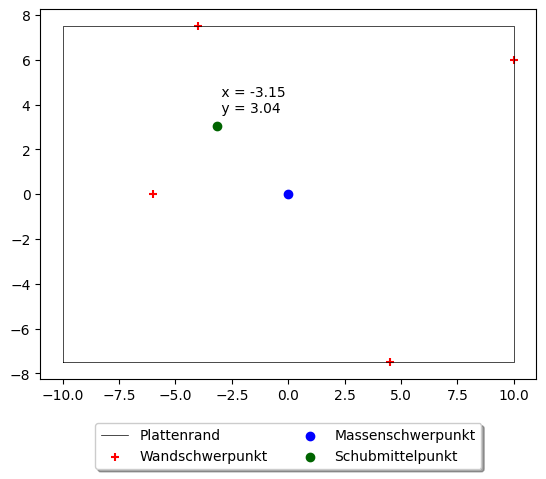

In [12]:
#| label: fig-darstellung_berechnung
#| fig-cap: "Grundriss mit Schubmittelpunkt"


##Wandschwerpunkte
x_i_plot = [x.subs(params)/unit.m for x in x_i]
y_i_plot = [y.subs(params)/unit.m for y in y_i]


##Plattenrand
platte_x = [-sp.Rational(2.5)*l_x, sp.Rational(2.5)*l_x,
            sp.Rational(2.5)*l_x, -sp.Rational(2.5)*l_x,
            -sp.Rational(2.5)*l_x]
platte_y = [-sp.Rational(1.5)*l_y, -sp.Rational(1.5)*l_y,
            sp.Rational(1.5)*l_y, sp.Rational(1.5)*l_y,
            -sp.Rational(1.5)*l_y]

platte_x_plot = [x.subs(params)/unit.m for x in platte_x]
platte_y_plot = [y.subs(params)/unit.m for y in platte_y]


##Schubmittelpunkt
x_c_plot = x_c.subs(params).evalf(3)/unit.m
y_c_plot = y_c.subs(params).evalf(3)/unit.m




plt.plot(platte_x_plot, platte_y_plot, color='black', label='Plattenrand', linewidth=0.5)
plt.scatter(x_i_plot, y_i_plot, color='red', marker='+', label='Wandschwerpunkt')
plt.scatter(0, 0, color='blue', marker='o', label='Massenschwerpunkt')
plt.scatter(x_c_plot, y_c_plot, color='darkgreen', marker='o', label='Schubmittelpunkt')
plt.annotate(f'\n x = {x_c_plot}\n y = {y_c_plot}', xy = [x_c_plot*1, y_c_plot*1.2])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)
plt.show()

#### Stockwerkquerkraft

Als Annahme dient eine Stockwerkquerkraft von $100$ kN in $Y$-Richtung. Verschoben in den Schubmittelpunkt resultiert eine Querkraft und ein Torsionsmoment $T$.

Des Weiteren wird das Koordinatensystem auf den Schubmittelpunkt geschoben.


In [13]:
V_y_tot = 100*10**3*unit.N
T_yc = V_y_tot * sp.Abs(x_c)

render.eq_display('V_y_tot', V_y_tot.subs(params).evalf(3),
                  'T_yc', T_yc.subs(params).evalf(3))

V_y_tot = 1.0e+5⋅newton

T_yc = 3.15e+5⋅meter⋅newton

##### Wandkoordinaten zum Schubmittelpunkt

In [14]:
x_i_star = x_i-x_c

for x in enumerate(x_i_star): 
       render.eq_display(f'x_{x[0]+1}',x[1].subs(params).evalf(3))

x₁ = -0.854⋅meter

x₂ = 7.65⋅meter

x₃ = -2.85⋅meter

x₄ = 13.1⋅meter

In [15]:
y_i_star = y_i - y_c

for y in enumerate(y_i_star): 
    render.eq_display(f'y_{y[0]+1}',y[1].subs(params).evalf(3))

y₁ = 4.46⋅meter

y₂ = -10.5⋅meter

y₃ = -3.04⋅meter

y₄ = 2.96⋅meter

##### Wandquerkraft

Die Kräfte wirken jeweils parallel zur Wandebene.

In [16]:
V_yi = (V_y_tot * I_x_i / np.sum(I_x_i)) + (T_yc * (I_x_i*x_i_star)) / np.sum((I_x_i*x_i_star**2)+(I_y_i*y_i_star**2))

for V in enumerate(V_yi): 
    render.eq_display(f'V_y{V[0]+1}',V[1].subs(params).evalf(3))


V_y1 = 226.0⋅newton

V_y2 = 242.0⋅newton

V_y3 = 7.07e+4⋅newton

V_y4 = 2.89e+4⋅newton

![Resultierende Querkräfte in den einzelnen Wänden](bilder/ekv3.jpg){#fig-V_waende}

##### Bemerkung zur Norm

Nach Norm [@SIA261_2020] 16.5.3.4 ist die Exzentrizität (Schubmittelpunkt zu Massenschwerpunkt) anhand der Gebäudeabmessungen zu erhöhen.

$$e_{d,sup} = 1.5\cdot e+0.05\cdot b$$
$$e_{d,inf} = 0.5\cdot e-0.05\cdot b$$

$b$ Gebäudebreite in der entsprechenden Kraftrichtung

$e$ Exzentrizität

Aus den entstehenden 4 Lastfällen ist der ungünstigste massgebend.

In [17]:
e_d_x_sup = sp.Abs(x_c) * 1.5+0.05*5*l_x
e_d_x_inf = sp.Abs(x_c) * 0.5-0.05*5*l_x

render.eq_display('e_dxsup', e_d_x_sup.subs(params).evalf(3),
                  'e_dxinf', e_d_x_inf.subs(params).evalf(3))

e_dxsup = 5.72⋅meter

e_dxinf = 0.573⋅meter